# Introduction
* Hello, our names are Dan, Dave, and Geary
* This is our project detailing the process undertaken to predict if a Piece should be Highlighted (`is_highlight`)

## Project Objective 
> Document code, process data (through entire pipeline), and articulate key findings and takeways
* Create modules that faciliate project repeatability, as well as final report readability
> Ask/Answer exploratory questions of data and attributes to understand drivers of `Highlight`  
* Utilize charts and statistical tests
> Construct models to predict `Highlight` using classification modeling techniques and Feature Engineering 
> Make recommendations

## Project Business Goals
> Construct ML Classification model that accurately predicts `Highlight`
* `Highlight` = Target Class 
> Find key features of `Highlight`
> Deliver report that the data science team can read through and replicate  
> Share steps were taken, why and what the outcome was.
> Make recommendations on what works or doesn't work in predicting `Highlight`

### Executive Summary
* Relied on clustering and feature weights for a bulk of feature differientation to predict `Highlight`
* Feature sets informed by the combination of Feature Engineering and Clustering/Feature Weights.
* Model gain on predictive performance vs. baseline prediction was minimal on test set (still was able to __________)

In [1]:
##imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,recall_score,precision_score,accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.feature_selection import RFE, SelectKBest, f_regression

import wrangle
import explore
import modeling


import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'explore'

## Wrangle (Acquire and Prep)
> Look for csv, Key Feature Names are:
- `the_libraries`
- `has_artist_url`
- `object_wikidata`
> Returns a dataframe that is cleaned from source (MetMuseum): 
- Features renamed; dropped features with low relevance (artist_prefix), remapped/consolidated features to threshold, filled NaN
* Feature Engineering
> Features:
- `feature_weighed`: Weight of features related to target from ________,________,________
- `_______`: Clusters of features from ________,________,________ 
- `_______`: Clusters of features from ________,________,________
- `_______`: Anomoly Prediction results from IsolationForest  
- `_______`: Features indicated by ________ to be related to our target `________`  
> Split:  
- Train: 60%  
- Validate: 20%  
- Test: 20%  
> Scaled:  
- MinMaxScaler(): Used for cluster engineering and modeling  
> Summary  
- Visualized distinctions within the data to inform exploratory analysis  
    

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test, df, target = wrangle.initalize_museum(new=True)
#df.info()

/Users/geary.shenck/codeup-data-science/capstone/capstone/wrangle.py:9: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  art = pd.read_csv('MetObjects.csv')


Prepared df: (477804, 26)

Train: (286682, 26)
Validate: (95561, 26)
Test: (95561, 26)


/Users/geary.shenck/codeup-data-science/capstone/capstone/wrangle.py:204: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=dummy_columns, drop_first=False)


df -> (477804, 94)
train -> (286682, 96)
validate -> (95561, 96)
test -> (95561, 96)


# Exploration
- Initial phase - Guidance

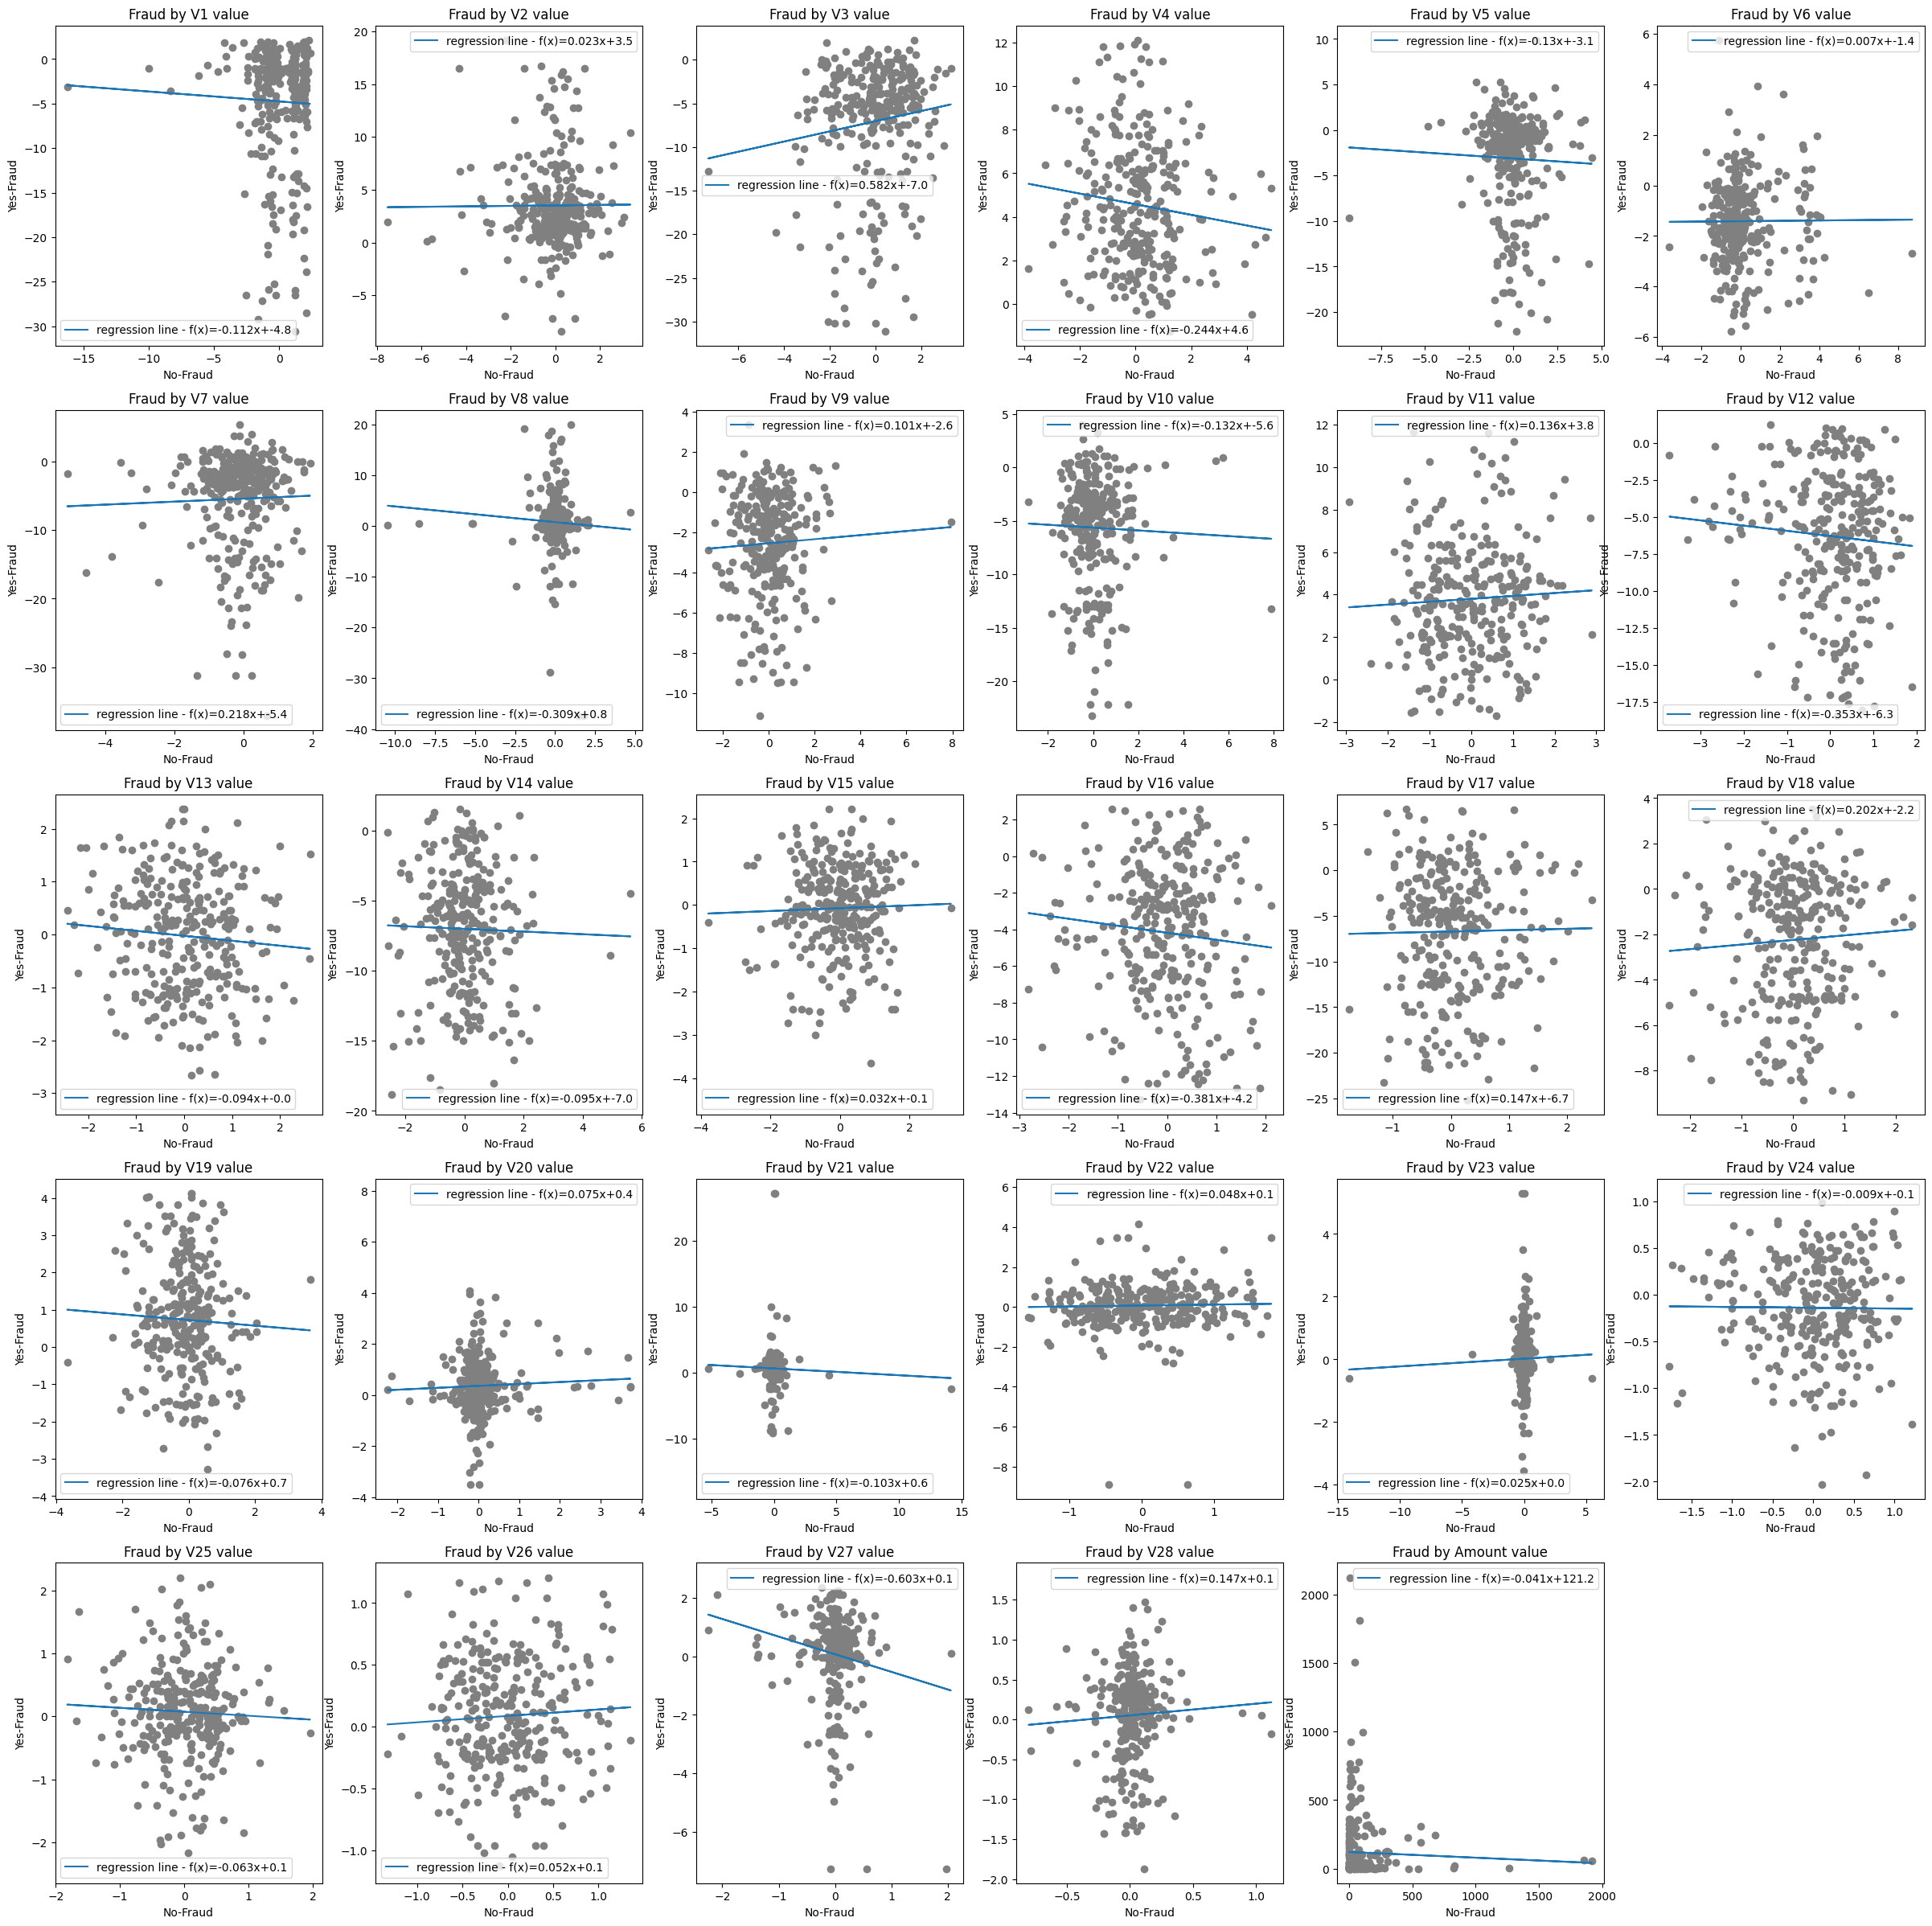

In [4]:
##expect about 2.5 minutes runtime
explore.ki_squared_for_explore(train,threshold=.75)

### Takeaway 
- ________________________

Let's investigate if our Departments contain inequal porportions of `Is Highlight` with enough deviance to be considered significant

##  **Hypothesis 1 - Is the count of  `is_highlight` for each Department in Department relative in relation to the other Departments for the count of `is_highlight`**

> $H_0$: The count of values for `Department_each` will not be signifcantly different from each other in porportion.    
> $H_a$: Rejection of Null ~~The count of values for `Department_each` will not be signifcantly different from each other in porportion.~~  
> alpha = .05  
> - Conclusion: There is enough evidence to reject our null hypothesis for SOME cases

V20 <-target | Fraud <-population name | Yes-Fraud <-sample name
We reject the null Hypothesis ( Y̶e̶s̶-̶F̶r̶a̶u̶d̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶F̶r̶a̶u̶d̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶V̶2̶0̶ ) t=5.29349, p=0.00000
----------
V23 <-target | Fraud <-population name | Yes-Fraud <-sample name
We fail to reject the null hypothesis ( Yes-Fraud as a sample has equal mean values to Fraud as a population regarding V23 ) t=0.43614, p=0.66306
----------
V28 <-target | Fraud <-population name | Yes-Fraud <-sample name
We fail to reject the null hypothesis ( Yes-Fraud as a sample has equal mean values to Fraud as a population regarding V28 ) t=1.60840, p=0.10882
----------


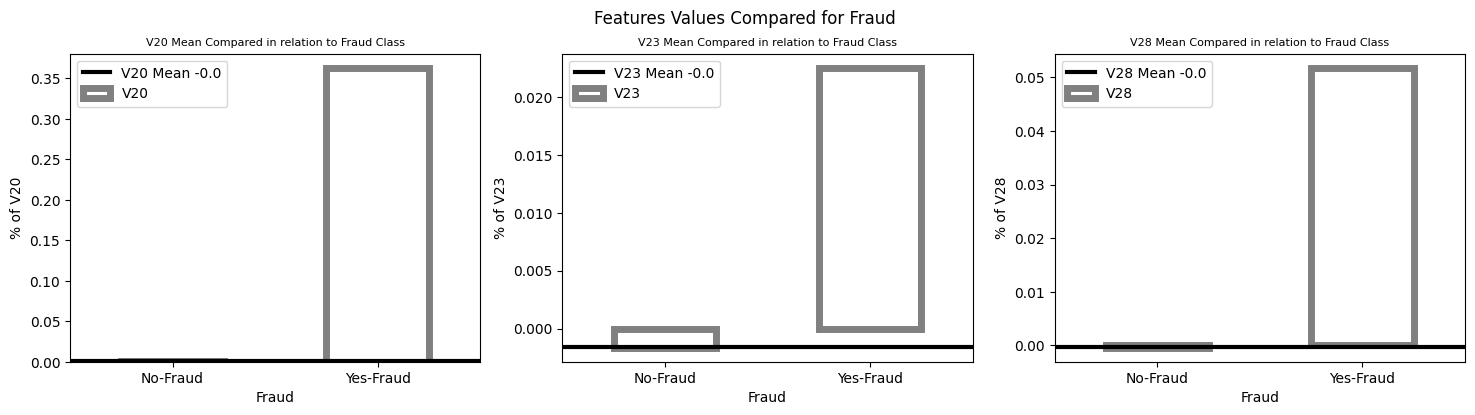

In [5]:
chi2_for_feature(train,"department")

## Q1 Takeaway:
- There are unequal porportions in `is highlight` for the departments.  
  - With focus on ['The Libraries', 'European Paintings', 'Robert Lehman Collection', 'The Cloisters', 'The American Wing', 'Musical Instruments', 'Modern and Contemporary Art'].  
  - While others being ignored ['Drawings and Prints', 'Asian Art', 'European Sculpture and Decorative Arts', 'Photographs', 'Greek and Roman Art']. 

let's ask some questions of the ________s and feature's engineered


##  **Hypothesis 2 - Is the distribution of ________ equal in all ________ groups?**
> - alpha = .05
> - $H_0$: `________` is not different in the distribution of `________` Groups. 
> - $H_a$: Rejection of Null ~~`________` is not different in the distribution of `________` Groups~~

> Conclusion: There is enough evidence to reject our null hypothesis for all cases

Observed
[[11356 22579 82069 54584]
 [  236     1    52     6]]
---
Expected
[[1.15719884e+04 2.25410195e+04 8.19792323e+04 5.44957598e+04]
 [2.00115869e+01 3.89804720e+01 1.41767730e+02 9.42402111e+01]]
---
chi^2 = 2512.0052, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶n̶o̶t̶ ̶d̶i̶f̶f̶e̶r̶e̶n̶t̶ ̶i̶n̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶V̶-̶0̶3̶0̶4̶0̶9̶ )


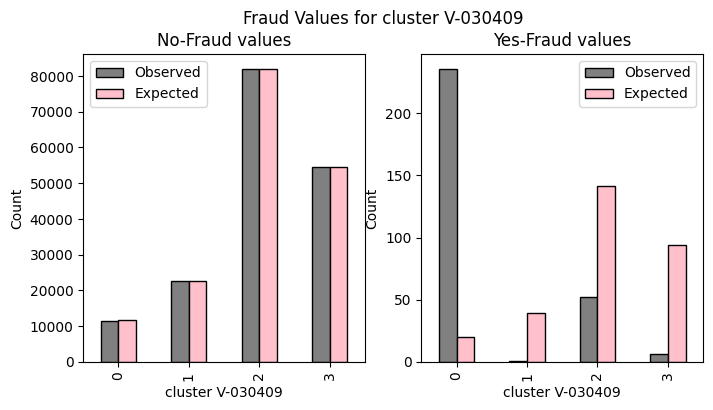

Observed
[[47932 61223 12157 49276]
 [   17    15   250    13]]
---
Expected
[[4.78662243e+04 6.11322832e+04 1.23855815e+04 4.92039111e+04]
 [8.27756711e+01 1.05716835e+02 2.14185437e+01 8.50889497e+01]]
---
chi^2 = 2635.1872, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶n̶o̶t̶ ̶d̶i̶f̶f̶e̶r̶e̶n̶t̶ ̶i̶n̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶V̶-̶1̶0̶1̶1̶1̶2̶ )


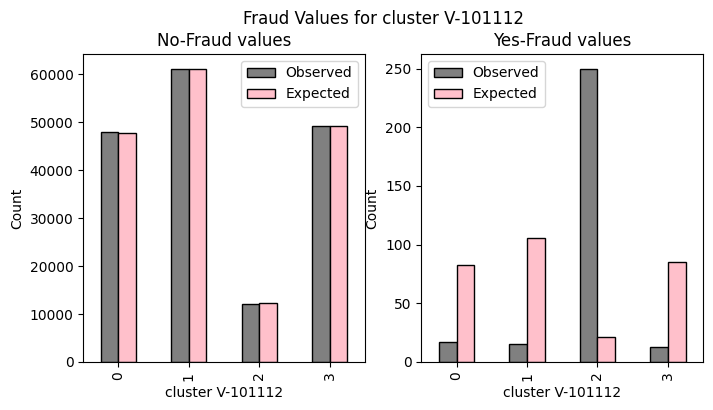

Observed
[[85619 28672 56268    29]
 [    7    72    57   159]]
---
Expected
[[8.54781815e+04 2.86943784e+04 5.62277646e+04 1.87675450e+02]
 [1.47818507e+02 4.96215539e+01 9.72353891e+01 3.24549546e-01]]
---
chi^2 = 77873.3075, p = 0.00000, degf = 3
due to p = 0.00000 < α = 0.05 we reject our null hypothesis
(  F̶r̶a̶u̶d̶ ̶i̶s̶ ̶n̶o̶t̶ ̶d̶i̶f̶f̶e̶r̶e̶n̶t̶ ̶i̶n̶ ̶t̶h̶e̶ ̶d̶i̶s̶t̶r̶i̶b̶u̶t̶i̶o̶n̶ ̶o̶f̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶V̶-̶1̶4̶1̶6̶1̶7̶ )


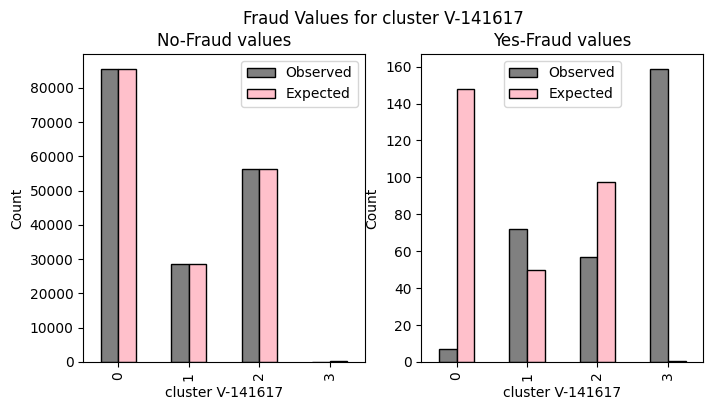

In [6]:
##calls a function tailored for this question and returns the result of each group against ________ to check for proportionality
chi2_target_v_groups(train,target,cluster_list)

### Takeaway
- > all ________ show have an affect on the distribution of ________, ________, ________, and ________ will all be good drivers for determining positive ________

In [7]:
list1=[(feature[1],0),(feature[2],2),(feature[3],3)]

Let's see if our engineer feature of ________ has significance in mean values related to ________
##  **Hypothesis 3 - When divided into ________ and ________, will the mean values of ________ remain the same?**
> - alpha = .05
> - $H_0$: The mean values of `________` will not be signifcantly different, relating to `________` and `________`.  
 $\mu_{________}$ independent $\mu_{________}$  
 
> - $H_a$: Rejection of Null ~~The mean values of `________` will not be signifcantly different, relating to `________` and `________`~~  
~~$\mu_{________}$ independent $\mu_{________}$~~

>Conclusion: There is enough evidence to ________ our null hypothesis for this case


we can reject that there are equal variance in these two groups with 1.0 certainty Flag=F stat=32563.39703, p=0.00000

 We reject the null Hypothesis ( F̶e̶a̶t̶u̶r̶e̶ ̶E̶n̶g̶i̶n̶e̶e̶r̶e̶d̶ ̶o̶f̶ ̶F̶r̶a̶u̶d̶ ̶i̶s̶ ̶e̶q̶u̶a̶l̶ ̶t̶o̶ ̶F̶e̶a̶t̶u̶r̶e̶ ̶E̶n̶g̶i̶n̶e̶e̶r̶e̶d̶ ̶o̶f̶ ̶N̶o̶t̶ ̶F̶r̶a̶u̶d̶ ) t=7.53924, p=0.00000


<Figure size 1200x600 with 0 Axes>

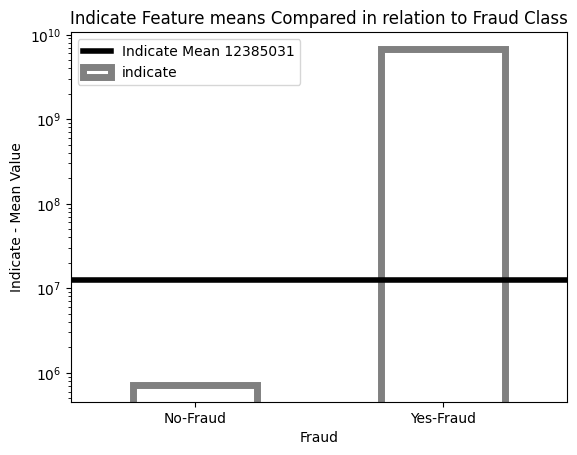

In [8]:
##function tailored for this question, please see documentation for questions
twosample_ttest_for_cc(train)

### Takeaway
- > The `________` engineered feature has greatly different means for the each class of `________` this will prove a ________ for our modeling

Let's see if our ________ that contained inequal distributions have enough "oomph" to be considered significant
##  **Hypothesis 4 - Are the mean values of ________ equal to each other in relation to ________**
> - alpha = .05
> - $H_0$: The mean values of `________` will not be signifcantly different from `________` relating `________`.  
> - $H_a$: Rejection of Null ~~The mean values of `________` will not be signifcantly different from `________` relating `________`.~~  
> Conclusion: There is enough evidence to ________ our null hypothesis for all cases

Class <-target | cluster V-030409 <-population name | 0 <-sample name
We reject the null Hypothesis ( 0̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶V̶-̶0̶3̶0̶4̶0̶9̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶F̶r̶a̶u̶d̶ ) t=14.20438, p=0.00000
----------
Class <-target | cluster V-101112 <-population name | 2 <-sample name
We reject the null Hypothesis ( 2̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶V̶-̶1̶0̶1̶1̶1̶2̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶F̶r̶a̶u̶d̶ ) t=14.60406, p=0.00000
----------
Class <-target | cluster V-141617 <-population name | 3 <-sample name
We reject the null Hypothesis ( 3̶ ̶a̶s̶ ̶a̶ ̶s̶a̶m̶p̶l̶e̶ ̶h̶a̶s̶ ̶e̶q̶u̶a̶l̶ ̶m̶e̶a̶n̶ ̶v̶a̶l̶u̶e̶s̶ ̶t̶o̶ ̶c̶l̶u̶s̶t̶e̶r̶ ̶V̶-̶1̶4̶1̶6̶1̶7̶ ̶a̶s̶ ̶a̶ ̶p̶o̶p̶u̶l̶a̶t̶i̶o̶n̶ ̶r̶e̶g̶a̶r̶d̶i̶n̶g̶ ̶F̶r̶a̶u̶d̶ ) t=31.95457, p=0.00000
----------


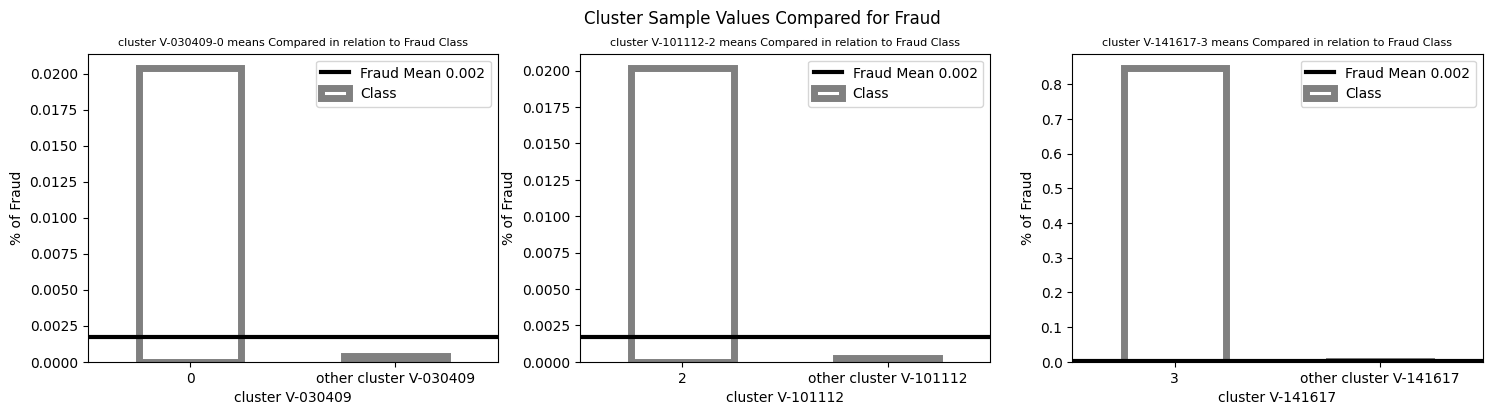

In [9]:
## calls tailored function for testing the ________ idenified as strong against their population mean to identify significance
sample_to_pop_ttest_strong_clusters(train,strong_clusters)

#### Takeaways
 - Confirms what we saw in the CHI^2 tests (with significance), with an emphasis on `________` as being a strong indicator of ________

## Explore Takeaways
 - Feature `________` hold value in determining ________ and will be used in modeling
 - Engineer Feature `________` will also be useful in modeling as a way to predict ________ with it's high deviance depending on ________
 - We have isolated ________ from our groups that will also provide benefit and will be utilized in modeling
 - Features to direct in our modeling phase: `________`, `________`, `________`, `________`, `________`

In [1]:
list2 =["________","________","________","________","________","________"]

# Modeling

In [11]:
X_train,y_train,X_validate,y_validate,X_test,y_test = encoding_for_modeling_Xy(train, train_scaled, validate, validate_scaled, test, test_scaled,target,model_feautures)

done


In [12]:
y_pred_val_dt,y_pred_logreg_val,y_pred_rf_val,clf,logreg,rf = modeling_initial(train,target,X_train,y_train,X_validate,y_validate)

0 <--- mode of Class(No-Fraud) in training data / baseline prediction
99.83% <--- accuracy of baseline prediciton in training data
----------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.92      0.62      0.74        99

    accuracy                           1.00     56962
   macro avg       0.96      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 	 Decision Tree classification report on validate set
----------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56863
         1.0       0.86      0.64      0.73        99

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 	 Logistic Regression validate classification
----------------
              precision    recall  f1-score   support

         

### Takeaways
* During initial testing a lot looks like ________ due to small size of our target variable
* `________` is set as baseline due to it being the majority of cases (________%)
* Only ________% of sample is `________` (________) our target Class
-----------
* After continued testing the my main three classfiers, was able to hypertune the parameters, optimizing for high precision on the validate set
* All models did pretty good at this point, being able to identify ________% of our target variable correctly
-----------
* for additional testing i could resample at a more even rate of the target variable (________)
-----------
* Models primarily compared via Precision and Recall (F1 score)
* ________ was the second best model, coming in under ________
-----------
* ________ was decent in it's performance and makes it a strong back-up candidate
* ________ was the best model that i could have faith would not lead to massive overfitting moving forward


## Opting to use ________ for the final test predictions
- almost all the model performances where ________ to each other, so used the one with the ________

In [2]:
## running the test set using my decision tree classifier
## produces confusion, classifification report as well as probabilities

#`code for final modeling`

### Test model Takeaway
Improves on baseline accuracy by ________% (of available ________%). Would ________ recommend this model over baseline!

# Conclusion
## Summary of Key Findings
* High level of ________ lead to utilizing tools to determine direction rather than Domain Knoweldge
* Feature creation was able to show difference in `________` prediction
* Feature sets informed by ________ performed best on model through validation phase
    * Best model utilized ________ and Feature Engineering
* Model gain on predictive performance vs. baseline prediction was ________ on test set
    * Baseline accuracy: ________
    * Test model accuracy: ________% (Higher is better)  
    
## Suggestions and Next Steps
* No suggestions this time as the model ________ baseline predictions
* Take a look at adding more features into the model to create a more robust predictor
    - The main features we explored would be a good starting point 
* Investigate features highlighted by ________ and see how they perform
* Possible look at reducing variation within features by analyzing significance
    - Identify features were `________` variation was driven by primarly outliers 
* May consider creating different or time specific models
* Take different approach to combining the data
    - Rely more on the raw features rather than feature engineering